In [695]:
import ta
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [696]:
df = yf.download('ETH-USD', start= '2021-01-01', interval = "1h")

[*********************100%***********************]  1 of 1 completed


In [697]:
# df['K'] = ta.momentum.stoch(df.High, df.Close, window = 14, smooth_window=3)
# df['D'] = df['K'].rolling(3).mean()
df['EMA_fast'] = ta.trend.ema_indicator(df.Close, window=13)
df['EMA_slow'] = ta.trend.ema_indicator(df.Close, window=62)
df['rsi'] = ta.momentum.rsi(df.Close, window=12)
df['macd'] = ta.trend.macd_diff(df.Close)

In [698]:
df.dropna(inplace=True)

In [699]:
# dfx = pd.DataFrame()
# for i in range(1,3):
#     mask = (df['EMA_fast'].shift(i) > df['EMA_slow'].shift(i))
#     dfx = dfx.append(mask, ignore_index=True)

In [700]:
# dfx.sum(axis=0)

In [701]:
# def gettriggers(df, lags, buy=True):
#     dfx = pd.DataFrame()
#     for i in range(1, lags+1):
#         if buy:
#             mask = (df['EMA_fast'].shift(i) > df['EMA_slow'].shift(i))
#         else:
#             mask = (df['EMA_fast'].shift(i) <= df['EMA_slow'].shift(i))
#         dfx = dfx.append(mask,ignore_index=True)
#     return dfx.sum(axis=0)

In [702]:
# df['buytrigger'] = np.where(gettriggers(df, 2),1,0)

In [703]:
# df['selltrigger'] = np.where(gettriggers(df, 2, False),1,0)

In [704]:
# df['Buy'] = np.where((df.buytrigger) & (df.rsi > 50) & (df.macd > 0),1,0)

In [705]:
# might be able to delete gettriggers/buytrigger/selltrigger and just do 
# df['Buy'] = np.where((df['EMA_fast'] > df['EMA_slow']) & (df.rsi > 50) & (df.macd > 0),1,0)

In [706]:
# df['Sell'] = np.where((df.selltrigger) & (df.rsi < 50) & (df.macd < 0),1,0)

In [707]:
df['Buy'] = np.where((df['EMA_fast'] > df['EMA_slow'])  & (df.rsi > 50) & (df.macd > 0),1,0)

In [708]:
df['Sell'] = np.where((df['EMA_fast'] < df['EMA_slow']),1,0) # | (df.macd < 0)

In [709]:
Buying_dates, Selling_dates = [], []

In [710]:
for i in range(len(df)-1):
    if df.Buy.iloc[i]:
        Buying_dates.append(df.iloc[i+1].name)
        for num,j in enumerate(df.Sell[i:]):
            if j:
                Selling_dates.append(df.iloc[i + num + 1].name)
                break
        

In [711]:
cut = len(Buying_dates) - len(Selling_dates)

In [713]:
if cut:
    Buying_dates = Buying_dates[:-cut]    

In [714]:
frame = pd.DataFrame({'Buying_dates':Buying_dates, 'Selling_dates':Selling_dates})

In [715]:
actual_trades = frame[frame.Buying_dates > frame.Selling_dates.shift(1)]

In [716]:
actual_trades

,Buying_dates,Selling_dates
101,2021-01-14 00:00:00+00:00,2021-01-21 09:00:00+00:00
182,2021-01-23 07:00:00+00:00,2021-01-23 15:00:00+00:00
187,2021-01-23 20:00:00+00:00,2021-01-26 09:00:00+00:00
214,2021-01-28 15:00:00+00:00,2021-01-31 15:00:00+00:00
248,2021-02-02 00:00:00+00:00,2021-02-07 06:00:00+00:00
...,...,...
2136,2021-11-19 20:00:00+00:00,2021-11-22 03:00:00+00:00
2156,2021-11-23 18:00:00+00:00,2021-11-24 19:00:00+00:00
2165,2021-11-25 00:00:00+00:00,2021-11-26 10:00:00+00:00
2190,2021-11-29 00:00:00+00:00,2021-12-02 17:00:00+00:00


In [717]:
def profitcalc():
    Buyprices = df.loc[actual_trades.Buying_dates].Open
    Sellprices = df.loc[actual_trades.Selling_dates].Open
    return (Sellprices.values - Buyprices.values)/Buyprices.values

In [718]:
profits = profitcalc()

In [719]:
profits

array([ 1.24449635e-01, -3.09270758e-02,  5.67186677e-02, -8.43987631e-03,
        1.81818927e-01,  1.38660142e-02,  8.19771817e-03, -2.59445379e-02,
       -2.05614838e-02,  5.83844905e-02, -2.34553261e-02,  5.29174642e-03,
        1.40576689e-01, -2.01672940e-02, -2.81706578e-02, -2.37629530e-02,
       -1.48278096e-02,  2.37716190e-01,  1.53638761e-01, -5.01367618e-02,
       -5.27926719e-02,  6.30878246e-01, -5.90304934e-02,  5.30052093e-02,
        2.74525879e-02, -5.52411106e-02, -4.68560663e-02, -6.79080911e-03,
       -2.47593176e-02, -4.03550681e-02,  5.26858051e-02,  2.80606259e-02,
       -3.09498215e-02, -2.87620161e-02, -3.78071825e-02,  3.17367662e-01,
        1.08272066e-01, -1.69989894e-04, -2.13700218e-02, -3.76071945e-02,
        5.86366019e-03, -3.91147140e-02, -1.71128043e-02, -2.32021451e-02,
        1.39915144e-01, -4.30542238e-02,  4.30997828e-02, -7.20630790e-03,
       -7.89431952e-02, -3.99334346e-02,  1.68642536e-01, -2.76258122e-02,
        3.61339719e-02, -

In [720]:
real_profits = profits - .00075

In [721]:
profits.mean()*100

2.2043323983059944

In [722]:
(profits+1).prod()*100 - 100

220.58212466219118

In [723]:
average_profit = sum(profits)/len(profits)*100
largest_gain = max(profits)*100
biggest_loss = min(profits)*100

In [724]:
print(f'Average Profit =',average_profit,'%')
print(f'Largest Gain =',largest_gain,'%')
print(f'Biggest Loss =',biggest_loss,'%')

Average Profit = 2.2043323983059944 %
Largest Gain = 63.087824623567656 %
Biggest Loss = -7.8943195235673835 %


In [725]:
((profits.mean() + 1)**(52))-1

2.107448207427939

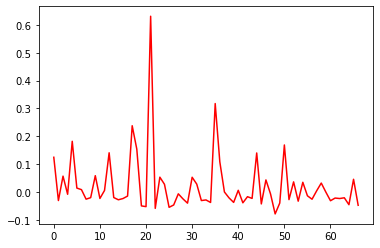

In [726]:
plt.plot(profits, color="red")

In [727]:
cumulative_profits =np.cumsum(profits)

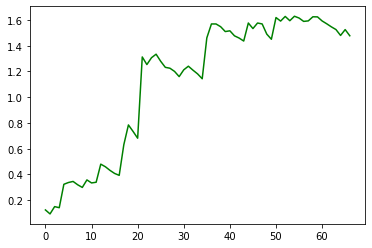

In [728]:
plt.plot(cumulative_profits, color="green")

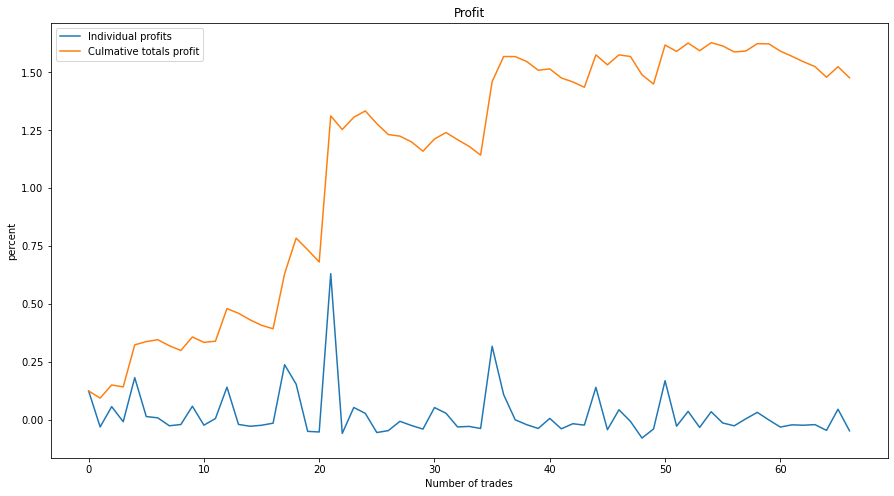

In [729]:
# line 1 points
x1 = profits
plt.figure(figsize=(15,8))
# plotting the line 1 points
plt.plot(x1, label = "Individual profits")
 
# line 2 points
x2 = cumulative_profits

# plotting the line 2 points
plt.plot(x2, label = "Culmative totals profit")
 
# naming the x axis
plt.xlabel('Number of trades')
# naming the y axis
plt.ylabel('percent')
# giving a title to my graph
plt.title('Profit')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

